In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 300
import logging
from logging.config import fileConfig
fileConfig('logging_config.ini')
logger = logging.getLogger('anl')

## True forecast covariance

In [2]:
N = 100
d1 = 1.0
d2 = 8.0
Pt = np.eye(N)
#for i in range(N):
#    for j in range(N):
#        p1 =  np.sqrt(float(i+1)*float(j+1)/float(N)/float(N))*np.exp(-0.5*(np.fabs(i-j)/d1)**2) 
#        p2 = np.sqrt((1.0-float(i+1)/float(N))*(1.0-float(j+1)/float(N)))*np.exp(-0.5*(np.fabs(i-j)/d2)**2) 
#        Pt[i,j] = p1 + p2
#        print(f"{i} {j} {p1:.5e} {p2:.5e} {Pt[i,j]:.5e}")
x = np.arange(1,N+1,dtype=np.float64)
y = np.arange(1,N+1,dtype=np.float64)
X, Y = np.meshgrid(x, y)
P1 = np.sqrt(X*Y/N/N)*np.exp(-0.5*(np.fabs(X-Y)/d1)**2)
P2 = np.sqrt((1.0-X/N)*(1.0-Y/N))*np.exp(-0.5*(np.fabs(X-Y)/d2)**2)
Pt = P1 + P2

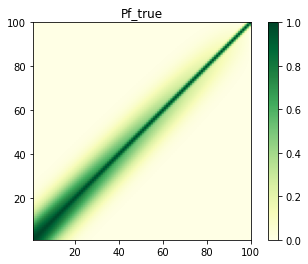

In [3]:
from matplotlib import cm
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
cmap = 'viridis'
fig, ax = plt.subplots()
levels = np.arange(0.1,1.1,0.1)
#mappable = ax.contourf(Pt, cmap=cmap)#, norm=Normalize(vmin=0., vmax=1.))
#cs = ax.contour(X,Y,Pt,levels)
cs = ax.imshow(Pt,origin='lower',cmap=cm.YlGn,extent=(1,N,1,N))
#ax.invert_yaxis()
ax.set_title('Pf_true')
ax.set_aspect('equal')
fig.colorbar(cs, ax=ax, orientation='vertical')
#fig.savefig('testdata/Pf_true.pdf')
plt.show()

In [4]:
from scipy.linalg import eigh, norm
eigs, eigv = eigh(Pt)
sPt = eigv @ np.diag(np.sqrt(eigs))
print(sPt.shape)
print(norm(Pt - sPt@sPt.transpose()))

(100, 100)
6.218850416675448e-14


## localization matrix

In [5]:
d1 = 1*3.0
d2 = 8*3.0
#Ftilde = np.eye(N)
#for i in range(N):
#    for j in range(N):
#        Ftilde[i,j] = np.sqrt(i*j/N/N)*np.exp(-0.5*((i-j)/d1)**2) + np.sqrt((1.0-float(i)/N)*(1.0-float(j)/N))*np.exp(-0.5*((i-j)/d2)**2) 
P1 = np.sqrt(X*Y/N/N)*np.exp(-0.5*(np.fabs(X-Y)/d1)**2)
P2 = np.sqrt((1.0-X/N)*(1.0-Y/N))*np.exp(-0.5*(np.fabs(X-Y)/d2)**2)
Ftilde = P1 + P2
eigs, eigv = eigh(Ftilde)
eigs = eigs[::-1]
eigv = eigv[:,::-1]
print(eigs)
neig = 0
thres = 0.85
frac = 0.0
eigsum = eigs.sum()
while frac < thres:
    frac += eigs[neig] / eigsum
    neig += 1
print(neig)
Wtilde = eigv[:,0:neig] @ np.diag(np.sqrt(eigs[0:neig]))
Flow = Wtilde @ Wtilde.transpose()

[ 3.26445265e+01  1.60740551e+01  8.68212682e+00  6.17506974e+00
  5.10920981e+00  4.36501217e+00  3.77110295e+00  3.27200188e+00
  2.84882280e+00  2.47998945e+00  2.15955807e+00  1.87671373e+00
  1.62842761e+00  1.40841873e+00  1.21470940e+00  1.04325030e+00
  8.92556752e-01  7.59795170e-01  6.43745307e-01  5.42283957e-01
  4.54343040e-01  3.78238873e-01  3.13000039e-01  2.57236339e-01
  2.10054948e-01  1.70287441e-01  1.37126711e-01  1.09596866e-01
  8.69943958e-02  6.85245177e-02  5.36023278e-02  4.16039268e-02
  3.20672699e-02  2.45228987e-02  1.86240018e-02  1.40325694e-02
  1.05007997e-02  7.79578247e-03  5.74856951e-03  4.20540932e-03
  3.05612798e-03  2.20336530e-03  1.57825199e-03  1.12157361e-03
  7.91984934e-04  5.54855929e-04  3.86308348e-04  2.66849035e-04
  1.83191845e-04  1.24766105e-04  8.44395783e-05  5.66841726e-05
  3.78001184e-05  2.49946377e-05  1.64093891e-05  1.06780089e-05
  6.89495160e-06  4.41145514e-06  2.79937145e-06  1.75980398e-06
  1.09682873e-06  6.77181

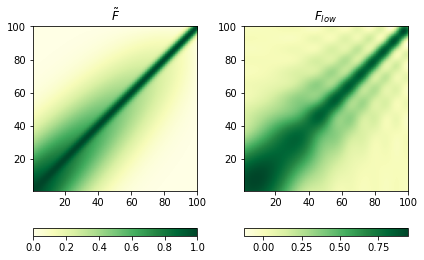

In [6]:
fig, ax = plt.subplots(1,2)
levels = np.arange(0.1,1.1,0.1)
#cs = ax[0].contour(X,Y,Ftilde,levels)
cs = ax[0].imshow(Ftilde,origin='lower',cmap=cm.YlGn,extent=(1,N,1,N))
#mappable = ax[0].matshow(Ftilde, cmap=cmap, norm=Normalize(vmin=-1., vmax=1.))
#ax[0].invert_yaxis()
ax[0].set_title(r'$\tilde{F}$')
fig.colorbar(cs, ax=ax[0], orientation='horizontal')
#cs = ax[1].contour(X,Y,Flow,levels)
cs = ax[1].imshow(Flow,origin='lower',cmap=cm.YlGn,extent=(1,N,1,N))
#mappable = ax[1].matshow(Flow, cmap=cmap, norm=Normalize(vmin=-1., vmax=1.))
#ax[1].invert_yaxis()
ax[1].set_title(r'$F_{low}$')
fig.colorbar(cs, ax=ax[1], orientation='horizontal')
fig.tight_layout()
plt.show()

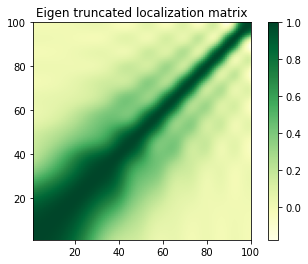

In [7]:
#W = Wtilde
diagF = np.diag(Flow)
#for i in range(W.shape[0]):
#    W[i, :] /= np.sqrt(diagF[i])
W = np.diag(1.0/np.sqrt(diagF)) @ Wtilde
F = W @ W.transpose()
fig, ax = plt.subplots()
#mappable = ax.matshow(F, cmap=cmap, norm=Normalize(vmin=-1., vmax=1.))
#cs = ax.contour(X,Y,F,levels)
cs = ax.imshow(F,origin='lower',cmap=cm.YlGn,extent=(1,N,1,N))
#ax.invert_yaxis()
ax.set_title(f'Eigen truncated localization matrix')
ax.set_aspect('equal')
fig.colorbar(cs, ax=ax, orientation='vertical')
#fig.savefig(f'testdata/locmat.pdf')
plt.show()

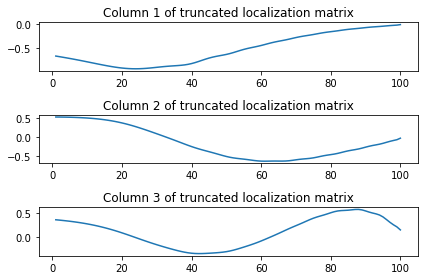

In [8]:
fig, ax = plt.subplots(ncols=1,nrows=3)
xaxis = np.arange(W.shape[0])+1
for j in range(3):
    ax[j].plot(xaxis,W[:,j])
    ax[j].set_title(f'Column {j+1} of truncated localization matrix')
fig.tight_layout()
plt.show()

In [34]:
# save square root of localization matrix
for im in range(W.shape[1]):
    np.savetxt(f"testdata/lsqrt_m{im+1:02d}.dat",W[:,im],fmt='%12.8f')

In [9]:
def calc_dist(i):
    d1 = 1
    d2 = 8
    dist = np.zeros(N)
    for j in range(N):
        dist[j] = np.sqrt(float(i+1)*float(j+1)/N/N)*(np.fabs(i-j)/d1) + np.sqrt((1.0-float(i+1)/N)*(1.0-float(j+1)/N))*(np.fabs(i-j)/d2) 
    return dist

def calc_dist1(i,j):
    d1 = 1.0
    d2 = 8.0
    Nr = float(N)
    ir = float(i+1)
    jr = float(j+1)
    dist = np.sqrt(ir*jr/Nr/Nr)*(np.fabs(ir-jr)/d1) + np.sqrt((1.0-ir/Nr)*(1.0-jr/Nr))*(np.fabs(ir-jr)/d2) 
    logger.debug(f'dist1={np.sqrt(ir*jr/Nr/Nr)*(np.fabs(ir-jr)/d1)} dist2={np.sqrt((1.0-ir/Nr)*(1.0-jr/Nr))*(np.fabs(ir-jr)/d2)}')
    return dist

## Observation operator and error covariance

In [10]:
class Obs():
    def __init__(self, operator, sigma,Pt,gamma):
        self.operator=operator
        self.sigma=sigma
        self.Pt = Pt
        self.a = 1.0
        self.b = 1.0
        self.gamma = gamma
        logger.info(f"operator={self.operator}, sigma={self.sigma},gamma={self.gamma}")
    
    def get_op(self):
        return self.operator
    
    def get_sig(self):
        return self.sigma
        
    def set_r(self, obsloc):
        from scipy.linalg import inv
        oberrstdev = self.sigma
        oberrvar = oberrstdev**2
        H = self.itpl_operator(obsloc, np.zeros(N))
        HPHt = H @ self.Pt @ H.transpose()
        R = oberrvar * np.diag(np.diag(HPHt))
        Rsqrt = oberrstdev * np.diag(np.sqrt(np.diag(HPHt)))
        Rsqrtinv = inv(Rsqrt)
        Rinv = Rsqrtinv.transpose() @ Rsqrtinv
        return R, Rsqrtinv, Rinv
    
    def itpl_operator(self, obsloc, x):
        p = obsloc.size
        n = x.size
        H = np.zeros((p,n))
        logger.debug(f"H={H.shape}")
        smooth_len = 4.0
        for j in range(p):
            for i in range(n):
                rr = float(i)-obsloc[j]
                r = np.fabs(rr) / smooth_len
                H[j,i] = np.exp(-r**2)
            H[j,:] = H[j,:]/H[j,:].sum()
        #    H[j,j] = 1.0        
        return H
    
    def dh_operator(self, obsloc, x):
        p = obsloc.size
        n = x.size
        H1 = self.itpl_operator(obsloc,np.arange(n))
        logger.debug(f"H1={H1.shape}")
        #dxb = np.exp(1.0/x)*(1.0/x/x)/(np.exp(1.0/x)-1)**2
        dxb = self.a*self.b/(np.cosh(self.b*x))**2
        #dxb = 0.5 + 0.5*self.gamma * np.power(0.1*np.fabs(x),(self.gamma-1))
        H = H1 @ np.diag(dxb)
        return H
    
    def h_operator(self,obsloc,x):
        #xb = 1.0 / (np.exp(1.0/x)-1.0)
        xb = self.a * np.tanh(self.b*x)
        #xb = 0.5*x*(1.0+np.power(0.1*np.fabs(x),(self.gamma-1)))
        if x.ndim > 1:
            hx = self.itpl_operator(obsloc,x[:,0]) @ xb
        else:
            hx = self.itpl_operator(obsloc,x) @ xb
        logger.debug(f"hx={hx.shape}")
        return hx

In [11]:
oberrstdev = 1.0 / 8.0
obs = Obs('vint', oberrstdev,Pt,10)
tmp = (np.arange(100) - 50.0)*0.05
print(tmp)
print(obs.h_operator(np.arange(tmp.size),tmp))

2022-01-16 18:22:03,443 anl INFO operator=vint, sigma=0.125,gamma=10


[-2.5  -2.45 -2.4  -2.35 -2.3  -2.25 -2.2  -2.15 -2.1  -2.05 -2.   -1.95
 -1.9  -1.85 -1.8  -1.75 -1.7  -1.65 -1.6  -1.55 -1.5  -1.45 -1.4  -1.35
 -1.3  -1.25 -1.2  -1.15 -1.1  -1.05 -1.   -0.95 -0.9  -0.85 -0.8  -0.75
 -0.7  -0.65 -0.6  -0.55 -0.5  -0.45 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15
 -0.1  -0.05  0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45
  0.5   0.55  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05
  1.1   1.15  1.2   1.25  1.3   1.35  1.4   1.45  1.5   1.55  1.6   1.65
  1.7   1.75  1.8   1.85  1.9   1.95  2.    2.05  2.1   2.15  2.2   2.25
  2.3   2.35  2.4   2.45]
[-9.83475524e-01 -9.82670103e-01 -9.81642570e-01 -9.80351695e-01
 -9.78765041e-01 -9.76864715e-01 -9.74647455e-01 -9.72117937e-01
 -9.69279187e-01 -9.66125681e-01 -9.62641480e-01 -9.58801859e-01
 -9.54575767e-01 -9.49927614e-01 -9.44818154e-01 -9.39204768e-01
 -9.33041473e-01 -9.26278852e-01 -9.18863970e-01 -9.10740324e-01
 -9.01847837e-01 -8.92122911e-01 -8.81498544e-01 -8.69904548e-01


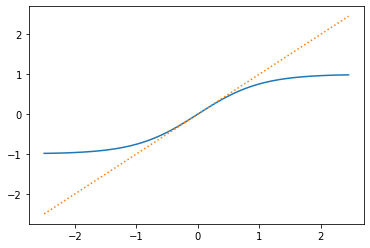

In [12]:
htmp = obs.h_operator(np.arange(tmp.size),tmp)
    #print(htmp)
plt.plot(tmp,htmp)#,label=r"$\gamma$="+f"{gamma}")
plt.plot(tmp,tmp,linestyle='dotted')
#plt.legend(ncol=2)
plt.show()

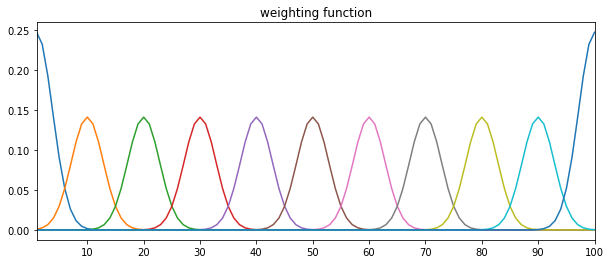

In [13]:
p = N #observed all grid
H = obs.itpl_operator(np.arange(p), np.zeros(N))
vindex = np.arange(1,p+1)
fig, ax = plt.subplots(figsize=(10,4))
for j in range(p):
    if j == 0 or np.mod(j+1,10) == 0:
        linestyle='solid'
        ax.plot(vindex,H[j], linestyle=linestyle)
    #else:
    #    linestyle='dashed'
    #ax.plot(vindex,H[j], linestyle=linestyle)
ax.set_xlim(vindex[0],vindex[-1])
ax.set_xticks(vindex[9::10])
ax.set_title('weighting function')
#fig.savefig('testdata/Hrow_reduced.pdf')
plt.show()

(100, 100) (100, 100) (100, 100)
1.4668417977904485e-17
0.0


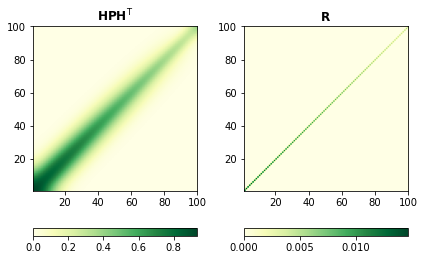

In [14]:
from scipy.linalg import inv
H = obs.itpl_operator(np.arange(N), np.zeros(N))
oberrvar = obs.get_sig()**2
HPHt = H @ Pt @ H.transpose()
R, Rsqrtinv, Rinv = obs.set_r(np.arange(N))
print(R.shape, Rsqrtinv.shape, Rinv.shape)
Rsqrt = inv(Rsqrtinv)
print(norm(R - Rsqrt@Rsqrt))
print(norm(Rinv - Rsqrtinv@Rsqrtinv))
fig, ax = plt.subplots(1,2)
#mappable = ax[0].matshow(HPHt, cmap=cmap, norm=Normalize(vmin=-1., vmax=1.))
#cs = ax[0].contour(X,Y,HPHt,levels, cmap=cmap)
cs = ax[0].imshow(HPHt,origin='lower', cmap=cm.YlGn,extent=(1,N,1,N))
#ax[0].invert_yaxis()
ax[0].set_aspect('equal')
ax[0].set_title(r"$\mathbf{H}\mathbf{P}\mathbf{H}^\mathrm{T}$")
fig.colorbar(cs, ax=ax[0], orientation='horizontal')
#mappable = ax[1].matshow(R, cmap=cmap, norm=Normalize(vmin=-oberrvar, vmax=oberrvar))
cs = ax[1].imshow(R,origin='lower', cmap=cm.YlGn,extent=(1,N,1,N))
#ax[1].invert_yaxis()
ax[1].set_title(r"$\mathbf{R}$")
fig.colorbar(cs, ax=ax[1], orientation='horizontal')
fig.tight_layout()
plt.show()

## Lists for storing results and counter

In [16]:
xrmse_mean = []
ntest = 6

### Test

## Random seed

In [16]:
rs = np.random.RandomState() 
rstrue = np.random.RandomState()

## True state and observation

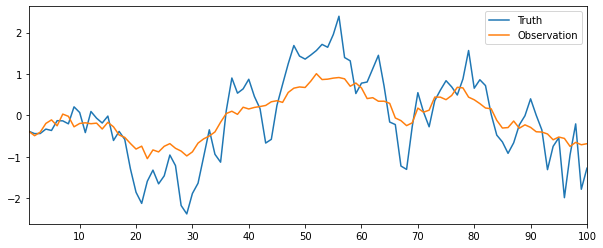

In [17]:
#xt = sPt @ rstrue.standard_normal(size=N)
xt = np.loadtxt(f"testdata/truth/truth_n{ntest:02d}.dat")
#y = obs.h_operator(np.arange(p), xt) + Rsqrt @ rs.standard_normal(size=p)
y = np.loadtxt(f"testdata/obs/obs_n{ntest:02d}.dat")
plt.figure(figsize=(10,4))
plt.plot(vindex, xt, label='Truth')
plt.plot(vindex, y, label='Observation')
plt.xticks(vindex[9::10])
plt.xlim(vindex[0],vindex[-1])
plt.legend()
#plt.savefig('true_obs.pdf')
plt.show()

In [18]:
# save data
np.savetxt(f"testdata/truth_n{ntest:02d}.dat", xt, fmt='%12.8f')
np.savetxt(f"testdata/obs_n{ntest:02d}.dat",y, fmt='%12.8f')
np.savetxt(f"testdata/obserr_n{ntest:02d}.dat",np.diag(Rsqrt), fmt='%12.8f')

## Forecast ensemble

In [19]:
K = 10
Xf = rs.standard_normal(size=(N,K))
Xf = sPt @ Xf
Xf = Xf - Xf.mean(axis=1)[:, None]
Pe = Xf @ Xf.transpose() / (K-1)
err = norm(Pt - Pe)
print(err)

28.125606706281385


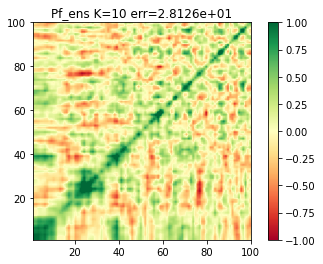

In [20]:
fig, ax = plt.subplots()
cmap = cm.RdYlGn
#mappable = ax.matshow(Pe, cmap=cmap, norm=Normalize(vmin=-2., vmax=2.))
#cs = ax.contour(X,Y,Pe,levels,cmap=cmap)
cs = ax.imshow(Pe,origin='lower',cmap=cmap,extent=(1,N,1,N),vmin=-1.,vmax=1.)
#ax.invert_yaxis()
ax.set_title(f'Pf_ens K={K} err={err:.4e}')
ax.set_aspect('equal')
fig.colorbar(cs, ax=ax, orientation='vertical')
#if ntest == 0:
#    fig.savefig(f'testdata/Pf_ens_{K}.pdf')
plt.show()

15.284759665892404


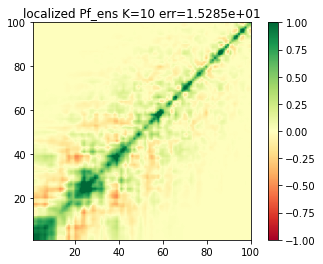

In [21]:
Ploc = Pe * F
err = norm(Pt - Ploc)
print(err)

fig, ax = plt.subplots()
#mappable = ax.matshow(Ploc, cmap=cmap, norm=Normalize(vmin=-2., vmax=2.))
#cs = ax.contour(X,Y,Ploc,levels,cmap=cmap)
cs = ax.imshow(Ploc,origin='lower',cmap=cmap,extent=(1,N,1,N),vmin=-1.,vmax=1.)
#ax.invert_yaxis()
ax.set_title(f'localized Pf_ens K={K} err={err:.4e}')
ax.set_aspect('equal')
fig.colorbar(cs, ax=ax, orientation='vertical')
#if ntest == 0:
#    fig.savefig(f'testdata/Pf_locens_{K}.pdf')
plt.show()

(100, 10)
1.507464507203105


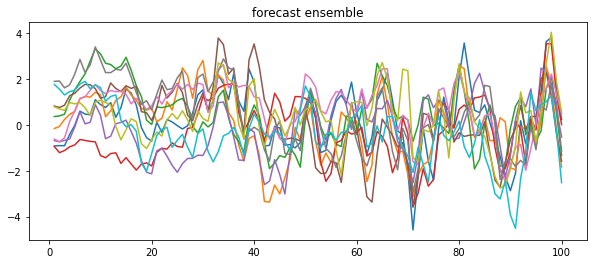

In [21]:
# forecast ensemble
## mean
#xf_ = sPt @ rs.standard_normal(size=N)
## member
#xf = xf_[:, None] + Xf
K = 10
xf = np.zeros((N,K))
for im in range(K):
    xf[:,im] = np.loadtxt(f"testdata/gues10/gues_enkf_m{im+1:02d}_n{ntest:02d}.dat")
print(xf.shape)
xf_ = xf.mean(axis=1)
Xf = xf - xf_[:, None]
Pe = Xf @ Xf.transpose() / (K-1)
initial_mean_err = np.sqrt(((xf.mean(axis=1) - xt)**2).mean())
print(initial_mean_err)
plt.figure(figsize=(10,4))
for k in range(K):
    plt.plot(vindex, xf[:,k])
plt.title('forecast ensemble')
plt.show()

In [23]:
# save data
for im in range(xf.shape[1]):
    np.savetxt(f"testdata/gues_enkf_m{im+1:02d}_n{ntest:02d}.dat",xf[:,im],fmt='%12.8f')

18.15238384632205


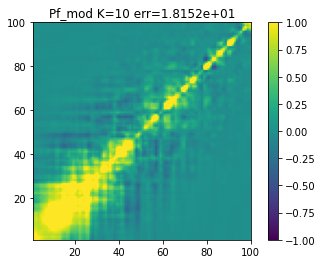

In [19]:
# modulated ensemble
L = W.shape[1]
M = K*L
Xfm = np.empty((N, M), Xf.dtype)
for l in range(L):
    for k in range(K):
        m = l*K + k
        Xfm[:, m] = W[:, l] * Xf[:, k]
Xfm *= np.sqrt((M-1)/(K-1))
Pmod = Xfm @ Xfm.transpose() / (M-1)
err = norm(Pt - Pmod)
print(err)

fig, ax = plt.subplots()
#mappable = ax.matshow(Pmod, cmap=cmap, norm=Normalize(vmin=-2., vmax=2.))
#cs = ax.contour(X,Y,Pmod,levels,cmap=cmap)
cs = ax.imshow(Pmod,origin='lower',cmap=cmap,extent=(1,N,1,N),vmin=-1.,vmax=1.)
#ax.invert_yaxis()
ax.set_aspect('equal')
ax.set_title(f'Pf_mod K={K} err={err:.4e}')
fig.colorbar(cs, ax=ax, orientation='vertical')
#if ntest == 0:
#    fig.savefig(f'testdata/Pf_modens_{K}.pdf')
plt.show()

## EnKF

In [22]:
params = {'etkf':('etkf',None,False,False),'etkf-b':('etkf',2,True,False),'letkf':('letkf',0,False,False)}
#names = ['mod','etkf','etkf-ss','etkf-rg','etkf-kloc','po','po-mod','po-kloc','srf','srf-ss','srf-rg','srf-kloc','letkf']
#names = ['mod','letkf']
names = ['etkf','etkf-b','letkf']
xa_list = []
Pa_app_list = []
from analysis.enkf import EnKF
for ptype in names:
    pt, iloc, ss, getkf = params[ptype]
    analysis = EnKF(pt, N, K, obs, iloc=iloc, lsig=3.0, ss=ss, getkf=getkf, l_mat=F, l_sqrt=W, calc_dist=calc_dist, calc_dist1=calc_dist1)
    xb = xf
    pb = Pe
    #xa, Pa, sPa, innv, chi2, ds = analysis(xb, pb, y[::-1], np.arange(p-1,-1,-1))
    xa, Pa, sPa, innv, chi2, ds = analysis(xb, pb, y, np.arange(p))
    #xa, Pa, sPa, innv, chi2, ds = analysis(xb, pb, np.roll(y, 50), np.roll(np.arange(p),50))
    #loc = rs.choice(p, size=p, replace=False)
    #print(loc)
    #j = 0
    #ob = np.zeros_like(y)
    #for i in loc:
    #    ob[j] = y[i]
    #    j += 1
    #xa, Pa, sPa, innv, chi2, ds = analysis(xb, pb, ob, loc)
    #for im in range(xa.shape[1]):
    #    np.savetxt(f"testdata/anal_{ptype}_m{im+1:02d}_n{ntest:02d}.dat",xa[:,im],fmt='%12.8f')
    xa_list.append(xa.mean(axis=1))
    Pa_app_list.append(Pa)
    #if ntest == 0:
    #    fig, ax = plt.subplots()
    #    mappable = ax.imshow(Pa,origin='lower', cmap=cmap, vmin=-.5, vmax=.5, extent=(1,N,1,N))
    #    #ax.invert_yaxis()
    #    ax.set_title(f'Pa_{ptype} K={K}')
    #    fig.colorbar(mappable, ax=ax, orientation='vertical')
    ##if ntest == 0:
    #    fig.savefig(f'testdata/Pa_{ptype}_{K}.pdf')
    #    plt.show()

2022-01-16 18:26:52,068 anl INFO model : model
2022-01-16 18:26:52,069 anl INFO pt=etkf op=vint sig=0.125 infl_parm=1.0 lsig=3.0
2022-01-16 18:26:52,070 anl INFO linf=False iloc=None ltlm=False
2022-01-16 18:26:52,118 anl INFO set R
2022-01-16 18:26:52,178 anl INFO pf max=2.428455839054447 min=-1.171128580523207
2022-01-16 18:26:52,331 anl INFO save_dh=False cycle0
2022-01-16 18:26:52,475 anl INFO converge gmat, iter_num=3, norm=6.446376686445557e-06
2022-01-16 18:26:52,476 anl INFO err=0.23329959925889493
2022-01-16 18:26:52,477 anl INFO dfs=8.755620579130916
2022-01-16 18:26:52,478 anl INFO model : model
2022-01-16 18:26:52,479 anl INFO pt=etkf op=vint sig=0.125 infl_parm=1.0 lsig=3.0
2022-01-16 18:26:52,479 anl INFO linf=False iloc=2 ltlm=False
2022-01-16 18:26:52,546 anl INFO set R
2022-01-16 18:26:52,603 anl INFO pf max=2.428455839054447 min=-1.171128580523207
2022-01-16 18:26:52,604 anl INFO ==B-localization==, lsig=3.0
2022-01-16 18:26:52,605 anl INFO == modulated ensemble, nmod

2022-01-16 18:26:53,652 anl INFO ==R-localization==, lsig=3.0
2022-01-16 18:26:53,659 anl INFO number of assimilated obs.=43
2022-01-16 18:26:53,660 anl INFO ==R-localization==, lsig=3.0
2022-01-16 18:26:53,664 anl INFO number of assimilated obs.=42
2022-01-16 18:26:53,665 anl INFO ==R-localization==, lsig=3.0
2022-01-16 18:26:53,670 anl INFO number of assimilated obs.=41
2022-01-16 18:26:53,671 anl INFO ==R-localization==, lsig=3.0
2022-01-16 18:26:53,676 anl INFO number of assimilated obs.=40
2022-01-16 18:26:53,677 anl INFO ==R-localization==, lsig=3.0
2022-01-16 18:26:53,680 anl INFO number of assimilated obs.=39
2022-01-16 18:26:53,681 anl INFO ==R-localization==, lsig=3.0
2022-01-16 18:26:53,685 anl INFO number of assimilated obs.=38
2022-01-16 18:26:53,686 anl INFO ==R-localization==, lsig=3.0
2022-01-16 18:26:53,691 anl INFO number of assimilated obs.=38
2022-01-16 18:26:53,692 anl INFO ==R-localization==, lsig=3.0
2022-01-16 18:26:53,697 anl INFO number of assimilated obs.=37


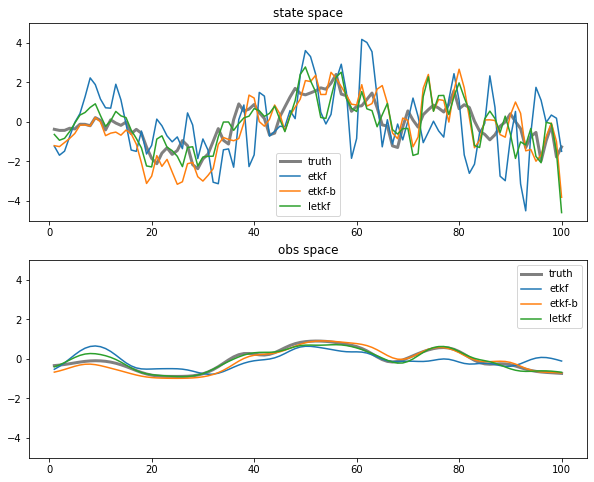

In [23]:
fig, ax = plt.subplots(ncols=1,nrows=2,figsize=(10,8))
xaxis = np.arange(1, N+1)
ax[0].plot(xaxis, xt, linewidth=3.0, color='gray', label='truth')
hxt = obs.h_operator(xaxis,xt)
ax[1].plot(xaxis, hxt, linewidth=3.0, color='gray', label='truth')
i = 0
for xam in xa_list:
    ax[0].plot(xaxis, xam, linewidth=1.5, label=names[i])
    hxam = obs.h_operator(xaxis,xam)
    ax[1].plot(xaxis, hxam, linewidth=1.5, label=names[i])
    i += 1
ax[0].legend()
ax[1].legend()
ax[0].set_ylim(-5.0,5.0)
ax[1].set_ylim(-5.0,5.0)
ax[0].set_title('state space')
ax[1].set_title('obs space')
plt.show()

### MLEF

(100, 11)
1.2734775531800273


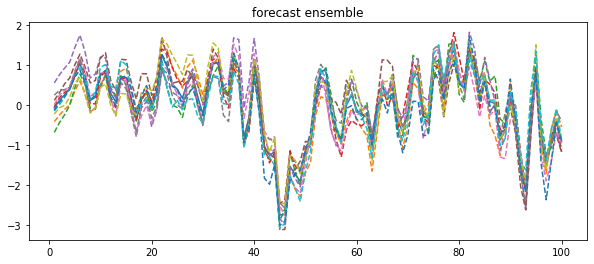

In [28]:
# forecast ensemble
## control
#xfc = sPt @ rs.standard_normal(size=N)
xfc = xf_
## member
xfe = xfc[:, None] + Xf / np.sqrt(K-1)
xf = np.zeros((N,K+1))
xf[:,0] = xfc
xf[:,1:] = xfe
print(xf.shape)
initial_ctrl_err = np.sqrt(((xfc - xt)**2).mean())
print(initial_ctrl_err)
plt.figure(figsize=(10,4))
plt.plot(vindex, xf[:,0])
for k in range(1,K+1):
    plt.plot(vindex, xf[:,k],linestyle='dashed')
plt.title('forecast ensemble')
plt.show()

In [29]:
# save data
np.savetxt(f"testdata/gues_cntl_n{ntest:02d}.dat",xf[:,0],fmt='%12.8f')
for im in range(1,xf.shape[1]):
    np.savetxt(f"testdata/gues_m{im:02d}_n{ntest:02d}.dat",xf[:,im],fmt='%12.8f')

In [30]:
params = {'mlef':('mlef',None,False,False),'mlef-b':('mlef',2,True,False),'lmlefcw':('mlef',0,False,False),'lmlefy':('mlef',0,False,False)}
names2 = ['mlef','mlef-b']#,'lmlefcw']#,'lmlefy']
#names2 = ['lmlef']
#names = ['mod','srf']#,'srf-ss','srf-kloc']
#Pa_app_list = [Pam]
from analysis.mlef import Mlef
from analysis.mlef_rloc import Mlef_rloc
from analysis.lmlef import Lmlef
for ptype in names2:
    pt, iloc, ss, gain = params[ptype]
    if ptype == 'lmlefcw':
        analysis = Mlef_rloc(pt, K, obs, lsig=3.0, calc_dist=calc_dist, calc_dist1=calc_dist1)
    elif ptype == 'lmlefy':
        analysis = Lmlef(pt, N, K, obs, lsig=3.0, calc_dist=calc_dist, calc_dist1=calc_dist1)
    else:
        analysis = Mlef(pt, N, K, obs, iloc=iloc, lsig=3.0, ss=ss, gain=gain, l_mat=F, l_sqrt=W, calc_dist=calc_dist, calc_dist1=calc_dist1)
    xb = xf
    pb = Pe
    xa, Pa, sPa, innv, chi2, ds = analysis(xb, pb, y, np.arange(p),method="CGF")
    #xa, Pa, sPa, innv, chi2, ds = analysis(xb, pb, y[::-1], np.arange(p-1,-1,-1))
    np.savetxt(f"testdata/anal_{ptype}_cntl_n{ntest:02d}.dat",xa[:,0],fmt='%12.8f')
    for im in range(1,xa.shape[1]):
        np.savetxt(f"testdata/anal_{ptype}_m{im:02d}_n{ntest:02d}.dat",xa[:,im],fmt='%12.8f')
    xa_list.append(xa[:,0])
    Pa_app_list.append(Pa)
    #if ntest == 0:    
    #    fig, ax = plt.subplots()
    #    mappable = ax.imshow(Pa,origin='lower', cmap=cmap, vmin=-.5, vmax=.5,extent=(1,N,1,N))
    #    ax.set_title(f'Pa_{ptype} K={K}')
    #    fig.colorbar(mappable, ax=ax, orientation='vertical')
    #    fig.savefig(f'testdata/Pa_{ptype}_{K}.pdf')
    #    plt.show()

2022-01-10 08:47:10,359 anl INFO model : model
2022-01-10 08:47:10,360 anl INFO ndim=100 nmem=10
2022-01-10 08:47:10,360 anl INFO pt=mlef op=vint sig=0.125 infl_parm=1.0 lsig=3.0
2022-01-10 08:47:10,361 anl INFO linf=False iloc=None ltlm=False incremental=False
2022-01-10 08:47:10,361 anl INFO set R
2022-01-10 08:47:10,534 anl INFO save_dh=False
2022-01-10 08:47:10,536 anl INFO method=CGF
2022-01-10 08:47:10,537 anl INFO cgtype: Fletcher-Reeves
2022-01-10 08:47:10,537 anl INFO restart=False
2022-01-10 08:47:10,537 anl INFO save_hist=False
2022-01-10 08:47:10,582 anl INFO jb:0.000000e+00 jo:2.084811e+03
2022-01-10 08:47:10,682 anl INFO initial function value =  2.084811e+03
2022-01-10 08:47:10,683 anl INFO initial gradient norm =  5.417927e+01
2022-01-10 08:47:10,683 anl INFO iflag=1 finish=False
2022-01-10 08:47:10,732 anl INFO jb:2.415692e-02 jo:2.069453e+03
2022-01-10 08:47:10,832 anl INFO iflag=1 finish=False
2022-01-10 08:47:10,878 anl INFO jb:6.039229e-01 jo:2.007175e+03
2022-01-1

2022-01-10 08:47:11,021 anl INFO jb:1.065320e+01 jo:1.747547e+03
2022-01-10 08:47:11,111 anl INFO iflag=1 finish=False
2022-01-10 08:47:11,161 anl INFO jb:1.745337e+02 jo:1.320684e+03
2022-01-10 08:47:11,252 anl INFO iflag=1 finish=False
2022-01-10 08:47:11,305 anl INFO jb:2.808990e+03 jo:1.731567e+03
2022-01-10 08:47:11,399 anl INFO iflag=1 finish=False
2022-01-10 08:47:11,449 anl INFO jb:4.038635e+02 jo:1.405198e+03
2022-01-10 08:47:11,551 anl INFO iflag=1 finish=False
2022-01-10 08:47:11,598 anl INFO jb:2.055318e+02 jo:1.329254e+03
2022-01-10 08:47:11,699 anl INFO iflag=1 finish=False
2022-01-10 08:47:11,749 anl INFO jb:1.795175e+02 jo:1.321830e+03
2022-01-10 08:47:11,850 anl INFO iflag=1 finish=False
2022-01-10 08:47:11,896 anl INFO jb:1.753643e+02 jo:1.320867e+03
2022-01-10 08:47:11,997 anl INFO iflag=1 finish=False
2022-01-10 08:47:12,047 anl INFO jb:1.746730e+02 jo:1.320714e+03
2022-01-10 08:47:12,148 anl INFO iflag=1 finish=False
2022-01-10 08:47:12,199 anl INFO jb:1.745571e+02

2022-01-10 08:47:15,469 anl INFO iflag=1 finish=False
2022-01-10 08:47:15,522 anl INFO jb:9.488572e+00 jo:6.983340e+02
2022-01-10 08:47:15,630 anl INFO iflag=1 finish=False
2022-01-10 08:47:15,682 anl INFO jb:6.153497e+01 jo:1.901896e+02
2022-01-10 08:47:15,783 anl INFO iflag=2 finish=False
2022-01-10 08:47:15,783 anl INFO iflag=1 finish=False
2022-01-10 08:47:15,838 anl INFO jb:3.833219e+03 jo:9.194869e+02
2022-01-10 08:47:15,942 anl INFO iflag=1 finish=False
2022-01-10 08:47:15,991 anl INFO jb:1.359892e+02 jo:2.502275e+02
2022-01-10 08:47:16,086 anl INFO iflag=1 finish=False
2022-01-10 08:47:16,135 anl INFO jb:7.149642e+01 jo:1.272375e+02
2022-01-10 08:47:16,232 anl INFO iflag=1 finish=False
2022-01-10 08:47:16,281 anl INFO jb:6.628246e+01 jo:1.281138e+02
2022-01-10 08:47:16,386 anl INFO iflag=2 finish=False
2022-01-10 08:47:16,386 anl INFO iflag=1 finish=False
2022-01-10 08:47:16,438 anl INFO jb:8.396788e+01 jo:8.571917e+01
2022-01-10 08:47:16,541 anl INFO iflag=1 finish=False
2022-

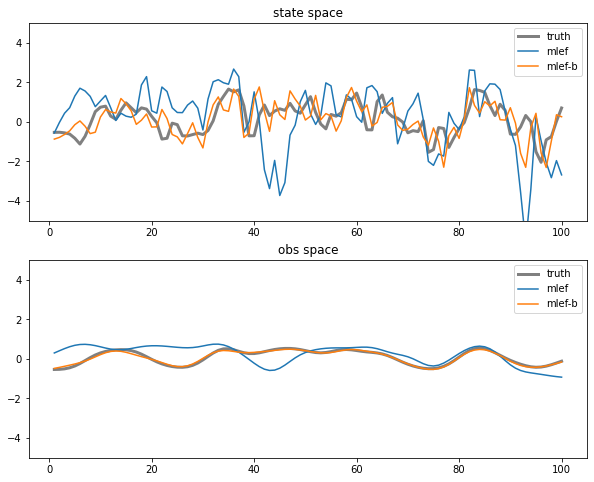

In [31]:
fig, ax = plt.subplots(ncols=1,nrows=2,figsize=(10,8))
xaxis = np.arange(1, N+1)
ax[0].plot(xaxis, xt, linewidth=3.0, color='gray', label='truth')
hxt = obs.h_operator(xaxis, xt)
ax[1].plot(xaxis, hxt, linewidth=3.0, color='gray', label='truth')
i = 0
for xam in xa_list[len(names):]:
    ax[0].plot(xaxis, xam, linewidth=1.5, label=names2[i])
    hxam = obs.h_operator(xaxis, xam)
    ax[1].plot(xaxis, hxam, linewidth=1.5, label=names2[i])
    i += 1
ax[0].legend()
ax[1].legend()
ax[0].set_ylim(-5.0,5.0)
ax[1].set_ylim(-5.0,5.0)
ax[0].set_title('state space')
ax[1].set_title('obs space')
plt.show()

In [32]:
method = names + names2
#print(names)
xrmse = []
i = 0
for xam in xa_list:
    #print(xam)
    if i < len(names):
        print(f"method:{method[i]} mean")
        xrmse.append(np.sqrt(((xam - xt)**2).mean())/initial_mean_err)
    else:
        print(f"method:{method[i]} ctrl")
        xrmse.append(np.sqrt(((xam - xt)**2).mean())/initial_ctrl_err)
    i += 1
print(method)
print(f"initial error : mean={initial_mean_err}, ctrl={initial_ctrl_err} obs error:{obs.get_sig()}")
print(xrmse)
xrmse_mean.append(xrmse)
rr = [initial_mean_err] + [initial_ctrl_err] + xrmse
np.savetxt(f"testdata/rr_n{ntest:02d}.dat",np.array(rr),fmt='%12.8f')
ntest += 1

method:etkf mean
method:etkf-b mean
method:letkf mean
method:mlef ctrl
method:mlef-b ctrl
['etkf', 'etkf-b', 'letkf', 'mlef', 'mlef-b']
initial error : mean=1.2734775531800273, ctrl=1.2734775531800273 obs error:0.125
[1.046751282710143, 0.770168943792101, 0.9108040846198766, 1.303635381719299, 0.6148817216822114]


## Check results

In [177]:
print(ntest)
print(np.array(xrmse_mean).shape)
rmse_m = np.array(xrmse_mean).mean(axis=0)
rmse_s = np.sqrt(((np.array(xrmse_mean) - rmse_m[None,:])**2).sum(axis=0)/(ntest-1))
for i in range(len(method)):
    print("{:9} {:5.3e}({:5.3e})"
          .format(method[i], rmse_m[i], rmse_s[i]))
#print(method)
#print(rmse_m)
#print(rmse_s)
#print(mse_m)
#print(mse_s)
#print(corr_m)
#print(corr_s)

10
(10, 5)
etkf      1.019e+00(1.928e-01)
etkf-b    5.236e-01(7.015e-02)
letkf     7.402e-01(1.420e-01)
mlef      1.036e+00(2.047e-01)
mlef-b    5.214e-01(6.997e-02)


[[1.1693016  0.66056703 0.71454024 1.27768545 0.53003824 0.59838513
  0.6307227  0.41364777]
 [1.56206483 0.75014995 0.87886386 1.75618866 0.71408263 0.73252839
  0.6937241  0.53795194]
 [0.89756315 0.55581788 0.64076104 1.08802202 0.37414741 0.48007738
  0.61887617 0.26106651]
 [1.08587573 0.85649113 0.82371425 1.25477814 0.55305199 0.84559716
  0.75819845 0.47437869]
 [1.04947287 0.81096447 0.74606679 1.55713166 0.55237129 0.61160437
  0.76134631 0.55830395]
 [1.12785753 0.73513423 0.74337038 1.         0.53508297 0.63266296
  0.63245249 0.44917012]
 [1.02075704 0.58435949 0.56510042 1.42035109 0.44231083 0.51320992
  0.77658841 0.41363443]
 [1.51914577 0.97301598 0.96480025 1.         0.71973175 0.84645642
  0.89492944 0.47792118]
 [1.11530455 0.84811643 0.76080599 1.33503984 0.57278662 0.72934368
  1.13710946 0.41185463]
 [0.93923466 0.78700329 0.7266501  1.44682974 0.60339689 0.66272945
  0.68010973 0.47404968]]
mlef 1.3136026600000001
mlef-b 0.559700062
lmlefcw 0.6652594860000001

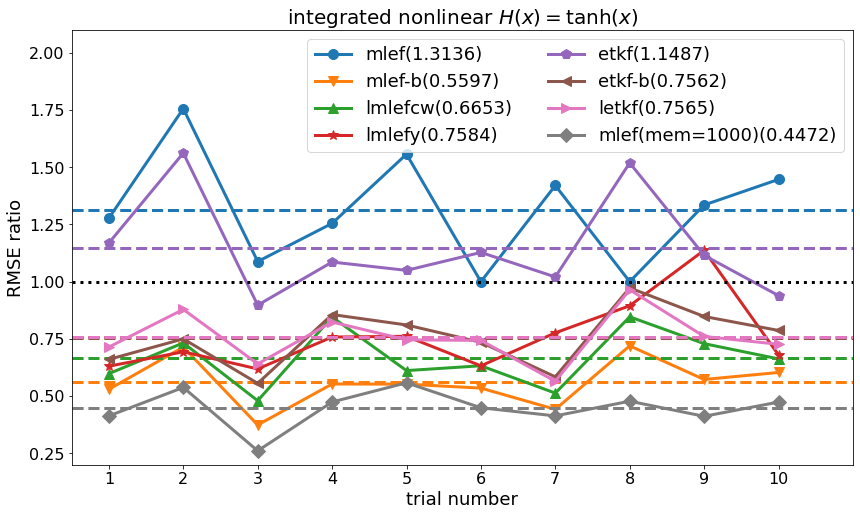

In [4]:
methods = ['etkf', 'etkf-b', 'letkf', 'mlef','mlef-b','lmlefcw','lmlefy','mlef(mem=1000)']
markers = ['o','v','^','*','p','<','>','D']
#gamma = 8
ntest = 10
testnum = np.arange(ntest)+1
RMSE = np.zeros((ntest,len(methods)))
for itest in range(ntest):
    data = np.loadtxt(f'testdata/res/rr_n{itest:02d}.dat')
    #data = np.loadtxt(f'testdata/rr_n{gamma}_{itest:02d}.dat')
#    print(data)
    RMSE[itest,:] = data[2:len(methods)+2]
print(RMSE)
fig, ax = plt.subplots(figsize=(14,8))
cmap = plt.get_cmap("tab10")
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
#plt.rcParams['xtick.major.size'] = 16
plt.rcParams['ytick.labelsize'] = 16
#plt.rcParams['ytick.major.size'] = 16
j = 0
order = [3,4,5,6,0,1,2,7]
for i in order:
    ax.plot(testnum,RMSE[:,i],markersize=10,\
    marker=markers[j],color=cmap(j),\
    linewidth=3.0,\
    label=f"{methods[i]}({RMSE[:,i].mean():.4f})")
    ax.hlines([RMSE[:,i].mean()],0,1,transform=ax.get_yaxis_transform(),linestyle='dashed',linewidth=3.0,color=cmap(j))
    print(methods[i],RMSE[:,i].mean())
    j += 1
ax.hlines([1.0],0,1,transform=ax.get_yaxis_transform(),linestyle='dotted',linewidth=3.0,color='k')
ax.legend(ncol=2,loc='upper right')
ax.set_xticks(testnum)
ax.set_xlim(testnum[0]-0.5,testnum[-1]+1)
ax.set_title('integrated nonlinear $H(x)=\mathrm{tanh}(x)$',fontsize=20)
#ax.set_title(r'integrated nonlinear $H(x)=x^n/2^{n-1}$, '+f'n={gamma}',fontsize=16)
ax.set_xlabel('trial number',fontsize=18)
ax.set_ylabel('RMSE ratio',fontsize=18)
ax.set_ylim(0.2,2.1)
fig.savefig(f'testdata/results_nonlinear.pdf')
#fig.savefig(f'testdata/results_nonlinear_n{gamma}.png')
plt.show()

[[1.25363854 1.12952577 1.14633501 1.24005139 1.07309875 1.12359802
  1.12163834]
 [1.01111116 0.89897512 0.89948512 0.9941947  0.84975126 0.89005171
  0.89973204]
 [1.19728267 1.16651567 1.07455872 1.17381801 1.02996052 1.06124782
  1.06156587]
 [1.27610037 1.15682551 1.18058725 1.27152027 1.11808189 1.16442293
  1.16745026]
 [1.08351385 0.95970655 0.95762588 1.06333615 0.88983657 0.9468426
  0.94411586]
 [1.10527801 1.01533174 1.00622323 1.10466485 0.94109176 0.99535772
  1.00574116]
 [1.21212689 1.07873888 1.0983409  1.18477006 1.02048004 1.0754397
  1.06604534]
 [1.30272273 1.20261807 1.19247787 1.30290901 1.12989778 1.17741281
  1.19065103]
 [1.53475999 1.34101372 1.37011554 1.49512114 1.11677683 1.28879941
  1.30517572]
 [1.30530239 1.15040249 1.19970269 1.2901658  1.08867793 1.14415793
  1.14356524]]
mlef 1.2120551370500001
mlef-b 1.02576533282
lmlefcw 1.0867330659699999
lmlefy 1.09056808485
etkf 1.2281836601899998
etkf-b 1.1099653510199998
letkf 1.1125452228400001


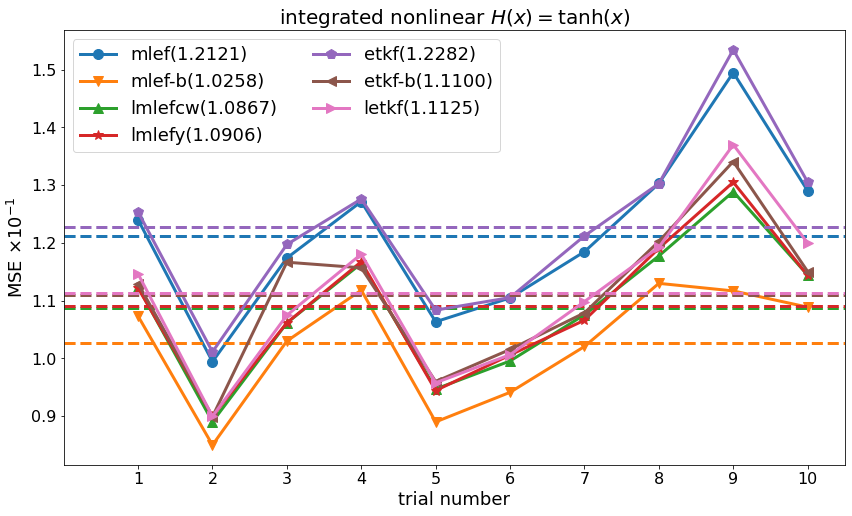

In [5]:
methods = ['etkf', 'etkf-b', 'letkf', 'mlef','mlef-b','lmlefcw','lmlefy']
markers = ['o','v','^','*','p','<','>','D']
#gamma = 8
ntest = 10
testnum = np.arange(ntest)+1
RMSE = np.zeros((ntest,len(methods)))
for itest in range(ntest):
    data = np.loadtxt(f'testdata/res/mse_n{itest:02d}.dat')
    #data = np.loadtxt(f'testdata/rr_n{gamma}_{itest:02d}.dat')
#    print(data)
    RMSE[itest,:] = data[:len(methods)]*1e-2
print(RMSE)
fig, ax = plt.subplots(figsize=(14,8))
cmap = plt.get_cmap("tab10")
plt.rcParams['legend.fontsize'] = 18
#plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 16
#plt.rcParams['xtick.major.size'] = 16
plt.rcParams['ytick.labelsize'] = 16
#plt.rcParams['ytick.major.size'] = 16
j = 0
order = [3,4,5,6,0,1,2]
for i in order:
    ax.plot(testnum,RMSE[:,i],markersize=10,\
    marker=markers[j],color=cmap(j),\
    linewidth=3.0,\
    label=f"{methods[i]}({RMSE[:,i].mean():.4f})")
    ax.hlines([RMSE[:,i].mean()],0,1,transform=ax.get_yaxis_transform(),linestyle='dashed',linewidth=3.0,color=cmap(j))
    print(methods[i],RMSE[:,i].mean())
    j += 1
#ax.hlines([1.0],0,1,transform=ax.get_yaxis_transform(),linestyle='dotted',color='k')
ax.legend(ncol=2,loc='upper left')
ax.set_xticks(testnum)
ax.set_xlim(testnum[0]-1,testnum[-1]+0.5)
ax.set_title('integrated nonlinear $H(x)=\mathrm{tanh}(x)$',fontsize=20)
#ax.set_title(r'integrated nonlinear $H(x)=x^n/2^{n-1}$, '+f'n={gamma}',fontsize=16)
ax.set_xlabel('trial number',fontsize=18)
ax.set_ylabel(r'MSE $\times 10^{-1}$',fontsize=18)
#ax.set_ylim(0.3,1.6)
fig.savefig(f'testdata/results_mse_nonlinear.pdf')
#fig.savefig(f'testdata/results_nonlinear_n{gamma}.png')
plt.show()

[[0.16584668 0.2298963  0.30279445 0.17631812 0.35321577 0.3559133
  0.35527578]
 [0.22051091 0.23035893 0.28566492 0.18032137 0.40656724 0.33345887
  0.33173077]
 [0.20055356 0.22382972 0.29537728 0.22137154 0.35013394 0.33850291
  0.26603953]
 [0.15787091 0.22003268 0.25775819 0.15340537 0.33810359 0.31698806
  0.3134166 ]
 [0.21388716 0.2450718  0.28701186 0.21044362 0.38901718 0.35344186
  0.33300001]
 [0.12662478 0.17952976 0.25834215 0.10497568 0.3385431  0.3196773
  0.29066909]
 [0.19013608 0.2416272  0.29531314 0.15508599 0.32930889 0.34142421
  0.29718441]
 [0.16328387 0.20223552 0.2693432  0.1553313  0.39626893 0.33433993
  0.27909148]
 [0.24361919 0.27934452 0.32715818 0.22179627 0.44161954 0.3816724
  0.3260375 ]
 [0.16091074 0.23380009 0.25867303 0.15690569 0.34895732 0.33124808
  0.33695681]]
mlef 0.173595495
mlef-b 0.36917355
lmlefcw 0.340666692
lmlefy 0.312940198
etkf 0.184324388
etkf-b 0.228572652
letkf 0.2837436400000001


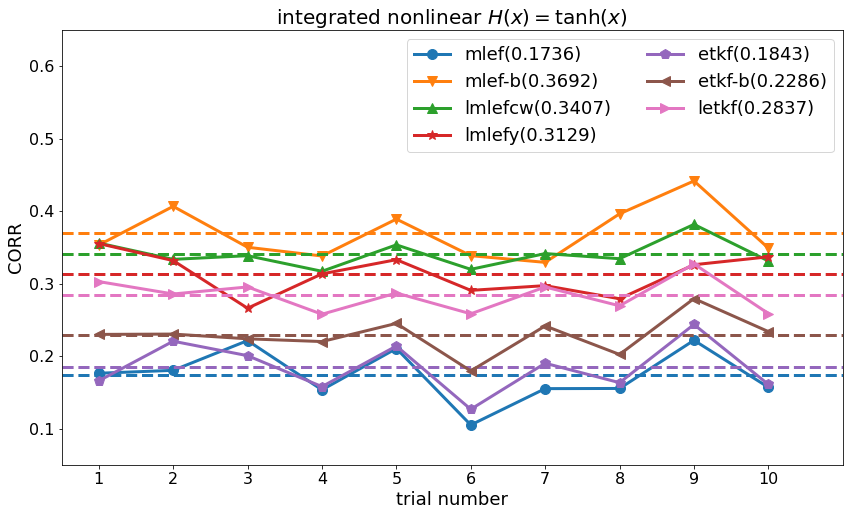

In [6]:
methods = ['etkf', 'etkf-b', 'letkf', 'mlef','mlef-b','lmlefcw','lmlefy']
markers = ['o','v','^','*','p','<','>','D']
#gamma = 8
ntest = 10
testnum = np.arange(ntest)+1
RMSE = np.zeros((ntest,len(methods)))
for itest in range(ntest):
    data = np.loadtxt(f'testdata/res/corr_n{itest:02d}.dat')
    #data = np.loadtxt(f'testdata/rr_n{gamma}_{itest:02d}.dat')
#    print(data)
    RMSE[itest,:] = data[:len(methods)]
print(RMSE)
fig, ax = plt.subplots(figsize=(14,8))
cmap = plt.get_cmap("tab10")
plt.rcParams['legend.fontsize'] = 18
#plt.rcParams['axes.labelsize'] = 16
#plt.rcParams['xtick.labelsize'] = 16
#plt.rcParams['xtick.major.size'] = 16
#plt.rcParams['ytick.labelsize'] = 16
#plt.rcParams['ytick.major.size'] = 16
j = 0
order = [3,4,5,6,0,1,2]
for i in order:
    ax.plot(testnum,RMSE[:,i],markersize=10,\
    marker=markers[j],color=cmap(j),\
    linewidth=3.0,\
    label=f"{methods[i]}({RMSE[:,i].mean():.4f})")
    ax.hlines([RMSE[:,i].mean()],0,1,transform=ax.get_yaxis_transform(),linestyle='dashed',linewidth=3.0,color=cmap(j))
    print(methods[i],RMSE[:,i].mean())
    j += 1
#ax.hlines([1.0],0,1,transform=ax.get_yaxis_transform(),linestyle='dotted',color='k')
ax.legend(ncol=2,loc='upper right')
ax.set_xticks(testnum)
ax.set_xlim(testnum[0]-0.5,testnum[-1]+1)
ax.set_title('integrated nonlinear $H(x)=\mathrm{tanh}(x)$',fontsize=20)
#ax.set_title(r'integrated nonlinear $H(x)=x^n/2^{n-1}$, '+f'n={gamma}',fontsize=16)
ax.set_xlabel('trial number',fontsize=18)
ax.set_ylabel('CORR',fontsize=18)
ax.set_ylim(0.05,0.65)
fig.savefig(f'testdata/results_corr_nonlinear.pdf')
#fig.savefig(f'testdata/results_nonlinear_n{gamma}.png')
plt.show()

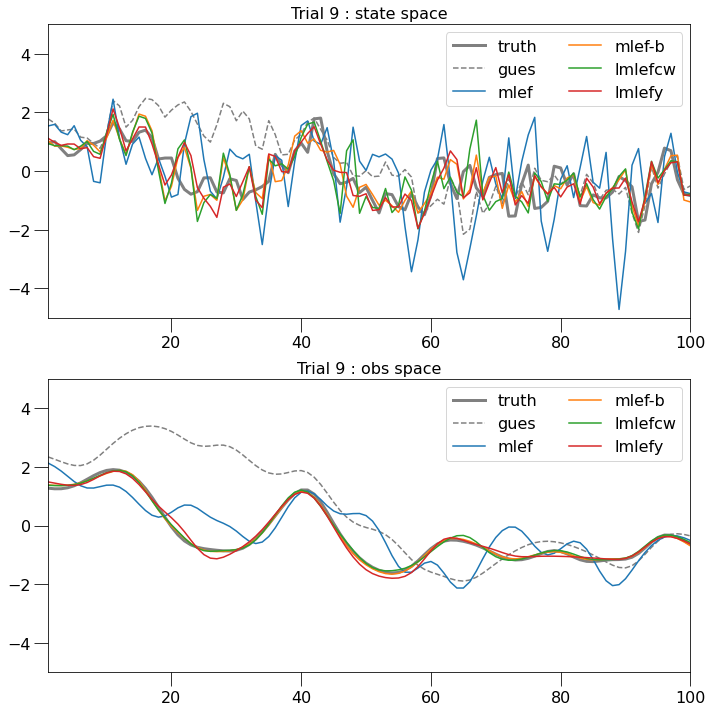

In [193]:
fig, ax = plt.subplots(ncols=1,nrows=2,figsize=(10,10))
xaxis = np.arange(1, N+1)
ax[0].plot(xaxis, xt, linewidth=3.0, color='gray', label='truth')
hxt = obs.h_operator(xaxis, xt)
ax[1].plot(xaxis, hxt, linewidth=3.0, color='gray', label='truth')
itest = 9
xfm = np.loadtxt(f"testdata/gues_cntl_n{itest:02d}.dat")
ax[0].plot(xaxis, xfm, linewidth=1.5, linestyle='dashed', color='gray', label='gues')
hxfm = obs.h_operator(xaxis, xfm)
ax[1].plot(xaxis,hxfm, linewidth=1.5, linestyle='dashed', color='gray', label='gues')
for ptype in methods[3:]:
    xam = np.loadtxt(f"testdata/anal_{ptype}_cntl_n{itest:02d}.dat")
    ax[0].plot(xaxis, xam, linewidth=1.5, label=ptype)
    hxam = obs.h_operator(xaxis, xam)
    ax[1].plot(xaxis, hxam, linewidth=1.5, label=ptype)
ax[0].legend(ncol=2)
ax[1].legend(ncol=2)
ax[0].set_ylim(-5.0,5.0)
ax[1].set_ylim(-5.0,5.0)
ax[0].set_xlim(xaxis[0],xaxis[-1])
ax[1].set_xlim(xaxis[0],xaxis[-1])
ax[0].set_title(f'Trial {itest} : state space')
ax[1].set_title(f'Trial {itest} : obs space')
fig.tight_layout()
plt.show()

In [186]:
print(np.array(xrmse_mean)[:,8])

[ 0.80246328  0.7910644   1.02816301  0.85896226  3.71135795  0.93230248
  0.79720744  0.80828731 11.18517452  0.68577241]


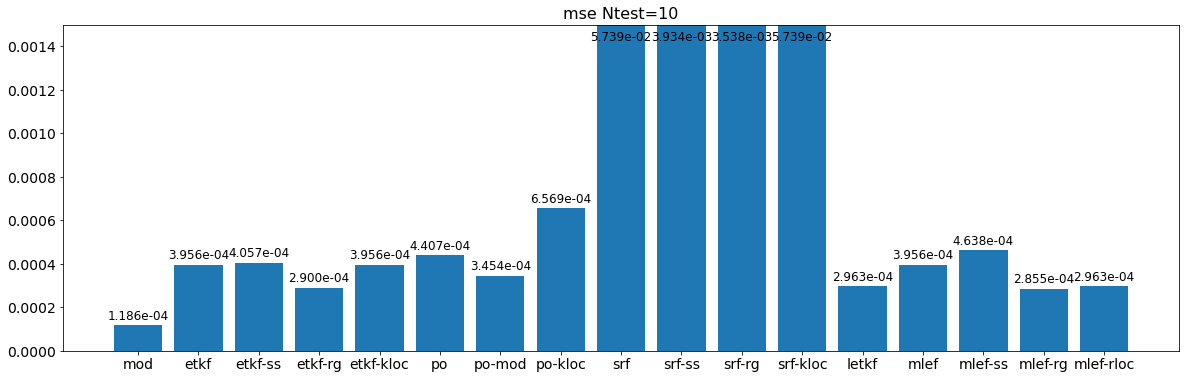

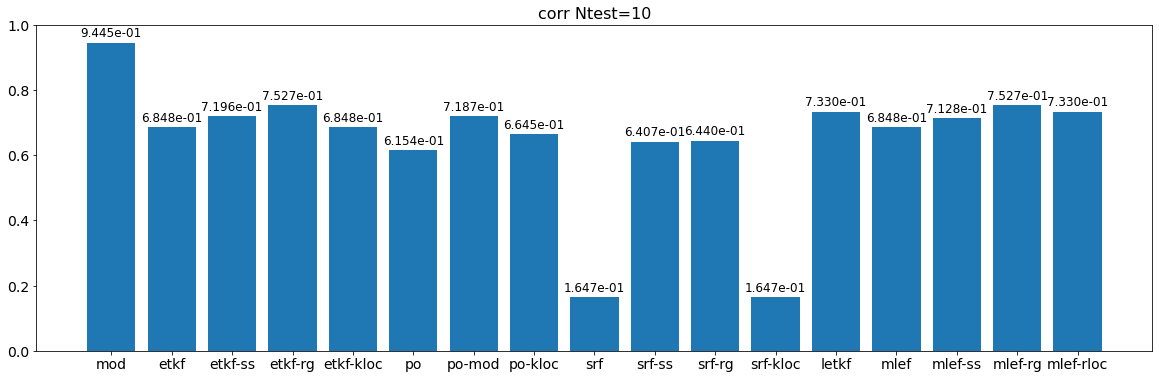

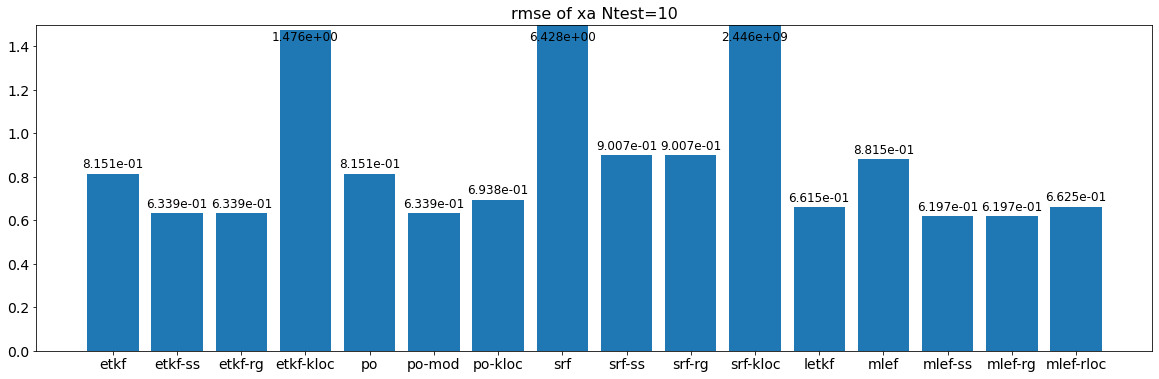

In [175]:
def autolabel(rects, set_lim=None):
    for rect in rects:
        height = rect.get_height()
        if set_lim is not None:
            height_t = min(height, set_lim)
        else:
            height_t = height
        ax.annotate('{:5.3e}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height_t),
                   xytext=(0, 3),
                   textcoords='offset points',
                   ha='center', va='bottom',
                   fontsize=12)
        
#names = ['mod','ss','rg','po','kloc']
#names = ['mod','etkf','etkf-ss','etkf-rg','etkf-kloc','po','po-mod','po-kloc','srf','srf-ss','srf-rg','srf-kloc','letkf','mlef','mlef-ss','mlef-rg','mlef-rloc']
names = method
fig, ax = plt.subplots(figsize=(20,6))
width = 0.25
xaxis = np.arange(len(Pa_app_list))
#xaxis1 = xaxis - width / 2
#xaxis2 = xaxis + width / 2
rects = ax.bar(names, mse_m)#, label="mse")
#ax.legend()
ax.set_xticks(names)
ax.tick_params(labelsize = 14)
ax.set_ylim(0.0,1.5e-3)
autolabel(rects, set_lim=1.4e-3)
ax.set_title(f"mse Ntest={ntest}", fontdict={'fontsize':16})
fig.savefig('mse.pdf')
plt.show()
fig, ax = plt.subplots(figsize=(20,6))
rects = ax.bar(names, corr_m)#, label="corr")
ax.set_xticks(names)
ax.tick_params(labelsize = 14)
ax.set_ylim(0.0,1.0)
autolabel(rects)
ax.set_title(f"corr Ntest={ntest}", fontdict={'fontsize':16})
fig.savefig('corr.pdf')
plt.show()
fig, ax = plt.subplots(figsize=(20,6))
rects = ax.bar(names[1:], rmse_m[1:])#, label="corr")
ax.set_xticks(names[1:])
ax.tick_params(labelsize = 14)
ax.set_ylim(0.0,1.5)
autolabel(rects, set_lim=1.4)
ax.set_title(f"rmse of xa Ntest={ntest}", fontdict={'fontsize':16})
fig.savefig('rmse.pdf')
plt.show()

## error norm tendency

In [24]:
def err_diag(P):
    err = np.mean((np.diag(P)-np.diag(Pt))**2)
    return np.sqrt(err)

def err_nd(P):
    sum_diag = np.sum((np.diag(P)-np.diag(Pt))**2)
    sum_all = np.sum((P-Pt)**2)
    sum_nd = sum_all - sum_diag
    num_nd = P.size - P.shape[0]
    print(f"all{sum_all:.4e} diagonal{sum_diag:.4e} off-diagonal{sum_nd:.4e} num_nd{num_nd}")
    return np.sqrt(sum_nd/num_nd)

In [25]:
# truth
Ptloc = Pt * F
errd_tl = err_diag(Ptloc)
errnd_tl = err_nd(Ptloc)
print(f"diagonal:{errd_tl:.4e}")
print(f"off-diagonal:{errnd_tl:.4e}")

all1.0310e+01 diagonal1.5900e-30 off-diagonal1.0310e+01 num_nd9900
diagonal:1.2610e-16
off-diagonal:3.2271e-02


In [26]:
Nens = [10, 20, 50, 100, 200, 500, 1000]
rs = np.random.RandomState()
errd = np.zeros(len(Nens))
errnd = np.zeros(len(Nens))
errd_l = np.zeros(len(Nens))
errnd_l = np.zeros(len(Nens))
nPt = Pt - np.diag(np.diag(Pt))
Ntest = 100
for j, K in zip(np.arange(errd.size),Nens):
    for i in range(Ntest):
        Xf = rs.standard_normal(size=(N,K))
        Xf = sPt @ Xf
        Xf = Xf - Xf.mean(axis=1)[:, None]
        Pe = Xf @ Xf.transpose() / (K-1)
        Ploc = Pe * F
        errd[j] += err_diag(Pe)
        errnd[j] += err_nd(Pe)
        errd_l[j] += err_diag(Ploc)
        errnd_l[j] += err_nd(Ploc)
        #errnorm = norm(np.diag(Pt) - np.diag(Pe))
        #if np.mod(i, 10) == 0:
        #    print(K,i,errnorm)
        #errd[j] += errnorm
        #Pe -= np.diag(np.diag(Pe)) - np.diag(np.diag(Pt))
        #errnorm = norm(nPt - Pe)
        #errnd[j] += errnorm
errd /= Ntest
errnd /= Ntest
errd_l /= Ntest
errnd_l /= Ntest
print(errd)
print(errnd)
print(errd_l)
print(errnd_l)

all1.1708e+03 diagonal2.0712e+01 off-diagonal1.1501e+03 num_nd9900
all2.7674e+02 diagonal2.0712e+01 off-diagonal2.5603e+02 num_nd9900
all1.1101e+03 diagonal1.5476e+01 off-diagonal1.0947e+03 num_nd9900
all2.7958e+02 diagonal1.5476e+01 off-diagonal2.6411e+02 num_nd9900
all1.3652e+03 diagonal2.0390e+01 off-diagonal1.3448e+03 num_nd9900
all2.9828e+02 diagonal2.0390e+01 off-diagonal2.7789e+02 num_nd9900
all1.3371e+03 diagonal2.8453e+01 off-diagonal1.3087e+03 num_nd9900
all3.8721e+02 diagonal2.8453e+01 off-diagonal3.5876e+02 num_nd9900
all1.2925e+03 diagonal2.1561e+01 off-diagonal1.2710e+03 num_nd9900
all2.3613e+02 diagonal2.1561e+01 off-diagonal2.1457e+02 num_nd9900
all1.3419e+03 diagonal3.2747e+01 off-diagonal1.3092e+03 num_nd9900
all3.1309e+02 diagonal3.2747e+01 off-diagonal2.8034e+02 num_nd9900
all1.1974e+03 diagonal2.4921e+01 off-diagonal1.1725e+03 num_nd9900
all3.4125e+02 diagonal2.4921e+01 off-diagonal3.1633e+02 num_nd9900
all6.4704e+02 diagonal1.5318e+01 off-diagonal6.3172e+02 num_nd

all2.2682e+02 diagonal4.4804e+00 off-diagonal2.2234e+02 num_nd9900
all5.7362e+01 diagonal4.4804e+00 off-diagonal5.2882e+01 num_nd9900
all1.7998e+02 diagonal3.5087e+00 off-diagonal1.7647e+02 num_nd9900
all4.5743e+01 diagonal3.5087e+00 off-diagonal4.2234e+01 num_nd9900
all2.2857e+02 diagonal5.8416e+00 off-diagonal2.2273e+02 num_nd9900
all6.4199e+01 diagonal5.8416e+00 off-diagonal5.8357e+01 num_nd9900
all4.8967e+02 diagonal1.4667e+01 off-diagonal4.7500e+02 num_nd9900
all2.6353e+02 diagonal1.4667e+01 off-diagonal2.4886e+02 num_nd9900
all2.2514e+02 diagonal4.6094e+00 off-diagonal2.2053e+02 num_nd9900
all6.4841e+01 diagonal4.6094e+00 off-diagonal6.0231e+01 num_nd9900
all2.2530e+02 diagonal3.8928e+00 off-diagonal2.2140e+02 num_nd9900
all5.9627e+01 diagonal3.8928e+00 off-diagonal5.5735e+01 num_nd9900
all2.0427e+02 diagonal4.0515e+00 off-diagonal2.0022e+02 num_nd9900
all5.0294e+01 diagonal4.0515e+00 off-diagonal4.6242e+01 num_nd9900
all2.2845e+02 diagonal3.8977e+00 off-diagonal2.2456e+02 num_nd

all8.8577e+01 diagonal2.1835e+00 off-diagonal8.6394e+01 num_nd9900
all3.7554e+01 diagonal2.1835e+00 off-diagonal3.5371e+01 num_nd9900
all9.4716e+01 diagonal2.8051e+00 off-diagonal9.1911e+01 num_nd9900
all4.4528e+01 diagonal2.8051e+00 off-diagonal4.1723e+01 num_nd9900
all1.5029e+02 diagonal2.4833e+00 off-diagonal1.4781e+02 num_nd9900
all4.1825e+01 diagonal2.4833e+00 off-diagonal3.9342e+01 num_nd9900
all8.7145e+01 diagonal1.5796e+00 off-diagonal8.5566e+01 num_nd9900
all2.8281e+01 diagonal1.5796e+00 off-diagonal2.6702e+01 num_nd9900
all1.3738e+02 diagonal2.9645e+00 off-diagonal1.3441e+02 num_nd9900
all4.5584e+01 diagonal2.9645e+00 off-diagonal4.2620e+01 num_nd9900
all9.9450e+01 diagonal1.0752e+00 off-diagonal9.8375e+01 num_nd9900
all2.2297e+01 diagonal1.0752e+00 off-diagonal2.1222e+01 num_nd9900
all9.7645e+01 diagonal1.7801e+00 off-diagonal9.5865e+01 num_nd9900
all3.0558e+01 diagonal1.7801e+00 off-diagonal2.8778e+01 num_nd9900
all1.0422e+02 diagonal1.1620e+00 off-diagonal1.0306e+02 num_nd

all2.0714e+01 diagonal4.2978e-01 off-diagonal2.0284e+01 num_nd9900
all2.2932e+01 diagonal5.8844e-01 off-diagonal2.2343e+01 num_nd9900
all1.7119e+01 diagonal5.8844e-01 off-diagonal1.6531e+01 num_nd9900
all1.8778e+01 diagonal2.8282e-01 off-diagonal1.8495e+01 num_nd9900
all1.4844e+01 diagonal2.8282e-01 off-diagonal1.4561e+01 num_nd9900
all2.2291e+01 diagonal3.5611e-01 off-diagonal2.1935e+01 num_nd9900
all1.4608e+01 diagonal3.5611e-01 off-diagonal1.4251e+01 num_nd9900
all2.0677e+01 diagonal4.3930e-01 off-diagonal2.0238e+01 num_nd9900
all1.6452e+01 diagonal4.3930e-01 off-diagonal1.6012e+01 num_nd9900
all1.9895e+01 diagonal4.4570e-01 off-diagonal1.9450e+01 num_nd9900
all1.8203e+01 diagonal4.4570e-01 off-diagonal1.7758e+01 num_nd9900
all2.2010e+01 diagonal3.9907e-01 off-diagonal2.1611e+01 num_nd9900
all1.4969e+01 diagonal3.9907e-01 off-diagonal1.4570e+01 num_nd9900
all1.9398e+01 diagonal2.8811e-01 off-diagonal1.9110e+01 num_nd9900
all1.2160e+01 diagonal2.8811e-01 off-diagonal1.1871e+01 num_nd

all2.1680e+01 diagonal2.6017e-01 off-diagonal2.1420e+01 num_nd9900
all1.7299e+01 diagonal2.6017e-01 off-diagonal1.7038e+01 num_nd9900
all2.0038e+01 diagonal2.9217e-01 off-diagonal1.9746e+01 num_nd9900
all1.6330e+01 diagonal2.9217e-01 off-diagonal1.6038e+01 num_nd9900
all1.5756e+01 diagonal2.0711e-01 off-diagonal1.5549e+01 num_nd9900
all1.1868e+01 diagonal2.0711e-01 off-diagonal1.1661e+01 num_nd9900
all1.8447e+01 diagonal2.7171e-01 off-diagonal1.8175e+01 num_nd9900
all1.6357e+01 diagonal2.7171e-01 off-diagonal1.6085e+01 num_nd9900
all1.7843e+01 diagonal4.0222e-01 off-diagonal1.7441e+01 num_nd9900
all1.7197e+01 diagonal4.0222e-01 off-diagonal1.6795e+01 num_nd9900
all1.9228e+01 diagonal3.3275e-01 off-diagonal1.8895e+01 num_nd9900
all1.5122e+01 diagonal3.3275e-01 off-diagonal1.4789e+01 num_nd9900
all1.9829e+01 diagonal4.4065e-01 off-diagonal1.9388e+01 num_nd9900
all1.2095e+01 diagonal4.4065e-01 off-diagonal1.1654e+01 num_nd9900
all1.9541e+01 diagonal5.0171e-01 off-diagonal1.9039e+01 num_nd

all1.1250e+01 diagonal1.9553e-01 off-diagonal1.1055e+01 num_nd9900
all1.3863e+01 diagonal1.9553e-01 off-diagonal1.3667e+01 num_nd9900
all1.2519e+01 diagonal1.9665e-01 off-diagonal1.2322e+01 num_nd9900
all1.1353e+01 diagonal1.9665e-01 off-diagonal1.1156e+01 num_nd9900
all8.7727e+00 diagonal1.7508e-01 off-diagonal8.5976e+00 num_nd9900
all1.0328e+01 diagonal1.7508e-01 off-diagonal1.0153e+01 num_nd9900
all1.1053e+01 diagonal2.3311e-01 off-diagonal1.0820e+01 num_nd9900
all1.1603e+01 diagonal2.3311e-01 off-diagonal1.1370e+01 num_nd9900
all9.5228e+00 diagonal1.6187e-01 off-diagonal9.3609e+00 num_nd9900
all1.3792e+01 diagonal1.6187e-01 off-diagonal1.3630e+01 num_nd9900
all1.1497e+01 diagonal1.8215e-01 off-diagonal1.1315e+01 num_nd9900
all1.2481e+01 diagonal1.8215e-01 off-diagonal1.2299e+01 num_nd9900
all1.1127e+01 diagonal2.8174e-01 off-diagonal1.0845e+01 num_nd9900
all1.4524e+01 diagonal2.8174e-01 off-diagonal1.4243e+01 num_nd9900
all8.9906e+00 diagonal1.6469e-01 off-diagonal8.8259e+00 num_nd

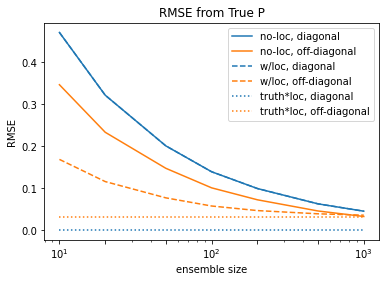

In [27]:
fig, ax = plt.subplots()
ax.plot(Nens, errd, color='tab:blue',label="no-loc, diagonal")
ax.plot(Nens, errnd, color='tab:orange',label="no-loc, off-diagonal")
ax.plot(Nens, errd_l, linestyle='dashed', color='tab:blue',label="w/loc, diagonal")
ax.plot(Nens, errnd_l, linestyle='dashed', color='tab:orange',label="w/loc, off-diagonal")
ax.plot(Nens, errd_tl*np.ones(len(Nens)), linestyle='dotted', color='tab:blue',label="truth*loc, diagonal")
ax.plot(Nens, errnd_tl*np.ones(len(Nens)),linestyle='dotted', color='tab:orange',label="truth*loc, off-diagonal")
ax.set_ylabel("RMSE")
ax.set_xlabel("ensemble size")
ax.set_xscale("log")
ax.set_xticks(Nens)
ax.set_title("RMSE from True P")
ax.legend()
fig.savefig("Pf_errnorm.pdf")
plt.show()

In [38]:
testlist = [np.zeros(3) for i in range(3)]
for i in range(len(testlist)):
    testlist[i] = np.arange(i*3,(i+1)*3)
print(testlist)
testarray = np.array(testlist).flatten()
print(testarray)

[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8])]
[0 1 2 3 4 5 6 7 8]
